### 1.How has user sentiment evolved across different versions of the ChatGPT app

In [12]:
import pandas as pd

file_path = '/Users/williamsempire/Desktop/Columbia/Courses/5067 NLP/FinalProj/cleaned_gpt_reviews.csv'
data = pd.read_csv(file_path)

In [13]:
print(data.head())


                               reviewId       userName  \
0  764bde06-e9d2-4211-97a2-f4f64bcf907d       M A saad   
1  36788635-5d48-4a4e-abdd-7fadffc07ac1   Sudip Sarkar   
2  74a2c5ec-2bdb-4784-ab8a-90224d65d981   Sehlule Moyo   
3  0f7a206b-4a5c-4b67-ad59-54e4d3cefe01  Preethi Preru   
4  e8f1438a-3734-4213-9884-aa33a9b79672   Fayzan Vhora   

                        comment  score            date_time  appVersion  \
0                   very active      5  2024-11-18 13:31:58  1.2024.310   
1               very nice app 🥰      5  2024-11-18 13:31:31  1.2024.268   
2                      good app      4  2024-11-18 13:31:05  1.2024.268   
3                     very good      5  2024-11-18 13:29:14  1.2024.310   
4  this is nice app for student      3  2024-11-18 13:27:53  1.2024.310   

         date      time Score_Sentiment  \
0  2024-11-18  13:31:58  Positive score   
1  2024-11-18  13:31:31  Positive score   
2  2024-11-18  13:31:05  Positive score   
3  2024-11-18  13:29:14  Pos

In [14]:
print(data.columns.tolist())

['reviewId', 'userName', 'comment', 'score', 'date_time', 'appVersion', 'date', 'time', 'Score_Sentiment', 'tokens', 'cleaned_tokens', 'Text_Sentiment', 'Emoji_Sentiment', 'Overall_Sentiment', 'Comment_Sentiment']


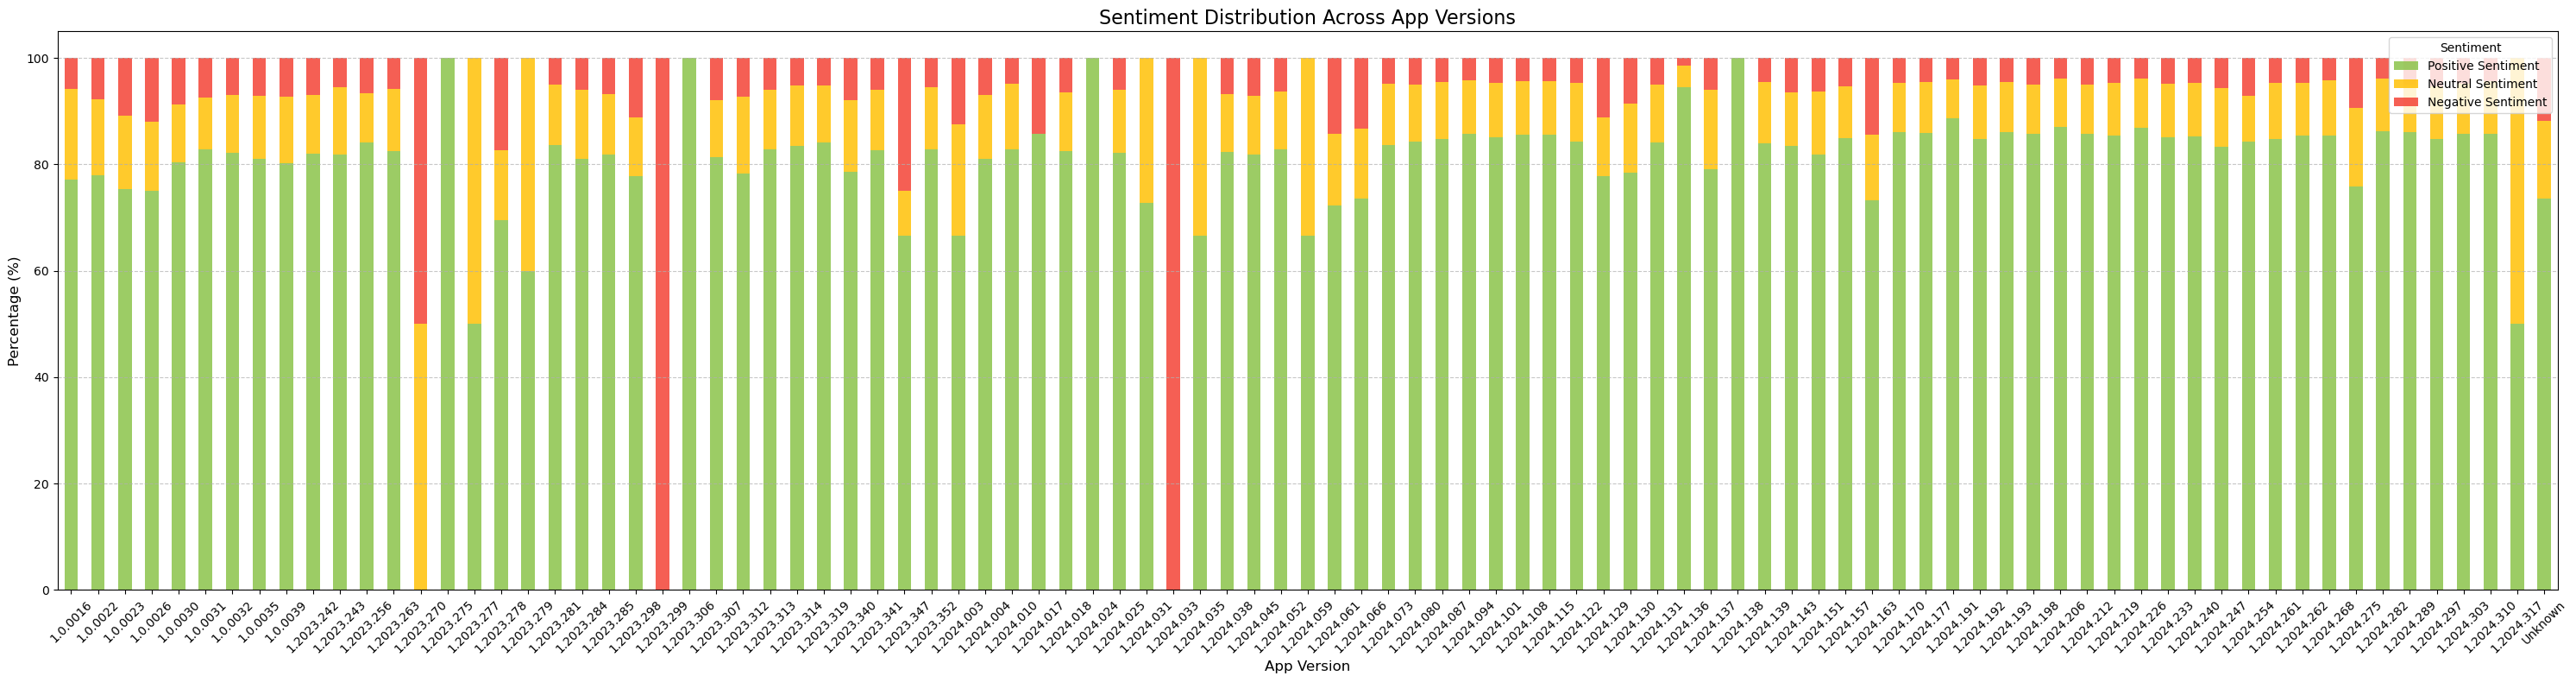

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Check and clean the data
if 'appVersion' not in data.columns or 'Comment_Sentiment' not in data.columns:
    raise ValueError("Missing required columns: 'appVersion' or 'Comment_Sentiment'")

data = data.dropna(subset=['appVersion', 'Comment_Sentiment'])  # Remove Null Values

# Group by appVersion and Comment_Sentiment and count the number of each sentiment
sentiment_distribution = data.groupby(['appVersion', 'Comment_Sentiment']).size().unstack(fill_value=0)

# Make sure the column order is ['Positive Sentiment', 'Neutral Sentiment', 'Negative Sentiment']
sentiment_order = ['Positive Sentiment', 'Neutral Sentiment', 'Negative Sentiment']
for col in sentiment_order:
    if col not in sentiment_distribution.columns:
        sentiment_distribution[col] = 0  # If a column is missing, fill it with 0
sentiment_distribution = sentiment_distribution[sentiment_order]

# Check if the group result is empty
if sentiment_distribution.empty:
    raise ValueError("The sentiment distribution is empty. Please check your data.")

# Calculating Percentages
sentiment_distribution_percentage = sentiment_distribution.div(sentiment_distribution.sum(axis=1), axis=0) * 100

# Draw a stacked column chart
sentiment_distribution_percentage.plot(
    kind='bar',
    stacked=True,
    figsize=(30, 8),
    color=['#8BC34A', '#FFC107', '#F44336'],  # Green=Positive Sentiment, Yellow=Neutral Sentiment, Red=Negative Sentiment
    alpha=0.85
)

# Adding a legend and title
plt.title('Sentiment Distribution Across App Versions', fontsize=16)
plt.xlabel('App Version', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(
    title='Sentiment', 
    labels=['Positive Sentiment', 'Neutral Sentiment', 'Negative Sentiment'],  # Binding to color order
    loc='upper right'
)
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and display charts
plt.tight_layout()
plt.show()


### ATTENTION: the abnormal high percentage sometimes can't reflect the result since they might caused by the small review number.

### 2.Do users' negative comments on different types of functions decrease with the update of versions?

In [16]:

keywords = {
    'performance': ['performance','accurate', 'faster', 'freeze', 'slow', 'crash','loading','delay','smooth','easy','speed','responsive','lag','frozen','hang','buffering','glitch'],
    'user_interface': ['ui','notifaction','alert', 'voice','dicpate','recording','recognition','user interface','responsive','drop down','customize','style','ux','interface', 'intuitive', 'design','friendly', 'navigation','buttons','button','menu','icons','theme','visual','look','feel','front','dark mode'],
    'response_quality': ['correct', 'response', 'language', 'accuracy', 'answer','output','insightful','incorrect','irrelevant','misleading','ambiguous','inaccurate','vague','informative','detailed','understandable','understand'],
    'prompt_handling': ['prompt', 'question', 'input', 'command','generate','clarify','interpret','execution','instruction','query','prompt engineering','misinterpret','retry','feedback','understands'],
    'updates': [' fix', 'update', 'updates','updated','bug', 'error','improvement','beta','agreed','improved','version','modify','modified','resolve','resolved','outdated','patch','support','issues']
}

def match_keywords(text, keyword_list):
    if isinstance(text, str):
        text = text.lower()
        return any(keyword in text for keyword in keyword_list)
    return False

for category, words in keywords.items():
    data[category] = data['cleaned_tokens'].apply(lambda x: match_keywords(x, words))

data_sample = data[['cleaned_tokens', 'performance', 'user_interface', 'response_quality', 'prompt_handling', 'updates']].head(10)

output_path = '/Users/williamsempire/Downloads/cleaned_gpt_reviews.csv'
data.to_csv(output_path, index=False)

print(data[['cleaned_tokens', 'performance', 'user_interface', 'response_quality', 'prompt_handling', 'updates']].head(10))


                                      cleaned_tokens  performance  \
0                                 ['very', 'active']        False   
1                       ['very', 'nice', 'app', '🥰']        False   
2                                    ['good', 'app']        False   
3                                   ['very', 'good']        False   
4                         ['nice', 'app', 'student']        False   
5                                           ['good']        False   
6                  ['chita', 'hi', 'kada', 'sharee']        False   
7                              ['really', 'helpful']        False   
8                                           ['nice']        False   
9  ['great', 'almost', 'solved', 'problem', "'m",...        False   

   user_interface  response_quality  prompt_handling  updates  
0           False             False            False    False  
1           False             False            False    False  
2           False             False            F

In [17]:
categories = ["performance", "user_interface", "response_quality", "prompt_handling", "updates"]

for category, words in keywords.items():
    data[category] = data['cleaned_tokens'].apply(lambda x: match_keywords(x, words))

data['category_flag'] = data[categories].idxmax(axis=1)

version_stats = data.groupby('appVersion').agg(
    **{f'{category}_count': (category, 'sum') for category in categories},  # Number of matches per question type
    total_reviews=('cleaned_tokens', lambda x: x.notnull().sum())  # Only valid comments are counted
).reset_index()

for category in categories:
    version_stats[f'{category}_percentage'] = (
        version_stats[f'{category}_count'] / version_stats['total_reviews']
    ) * 100

for category in categories:
    version_stats[f'{category}_percentage'] = (version_stats[f'{category}_count'] / version_stats['total_reviews']) * 100

version_stats = version_stats.reset_index()

print(version_stats.head(10))

   index  appVersion  performance_count  user_interface_count  \
0      0    1.0.0016                255                   275   
1      1    1.0.0022                164                   204   
2      2    1.0.0023                348                   478   
3      3    1.0.0026                 77                    89   
4      4    1.0.0030                 30                    47   
5      5    1.0.0031                 53                    69   
6      6    1.0.0032                 97                   120   
7      7    1.0.0035                 97                   102   
8      8    1.0.0039                191                   196   
9      9  1.2023.242                 57                    72   

   response_quality_count  prompt_handling_count  updates_count  \
0                     216                    112            211   
1                     154                    101            149   
2                     404                    245            347   
3               

    appVersion  total_reviews
0     1.0.0016           2418
1     1.0.0022           1480
2     1.0.0023           2944
3     1.0.0026            755
4     1.0.0030            402
..         ...            ...
88  1.2024.297           1751
89  1.2024.303           3613
90  1.2024.310           3184
91  1.2024.317              4
92     Unknown          21753

[93 rows x 2 columns]
    appVersion  total_percentage
0     1.0.0016         44.210091
1     1.0.0022         52.162162
2     1.0.0023         61.888587
3     1.0.0026         54.437086
4     1.0.0030         47.761194
..         ...               ...
88  1.2024.297         19.017704
89  1.2024.303         17.907556
90  1.2024.310         16.017588
91  1.2024.317          0.000000
92     Unknown         27.159472

[93 rows x 2 columns]


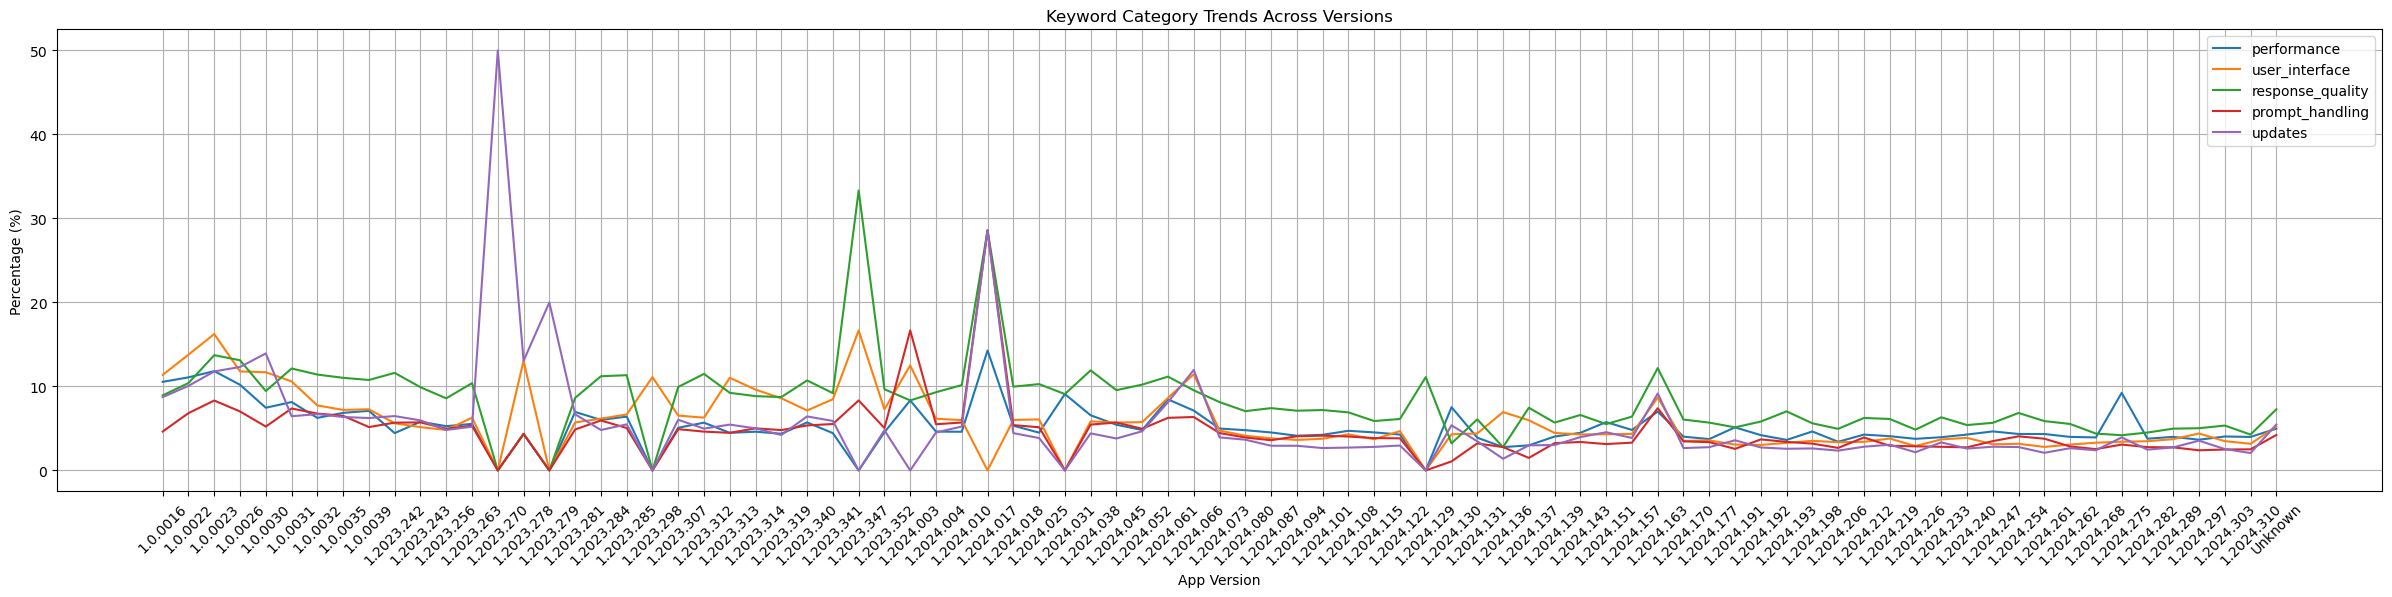

In [18]:
import matplotlib.pyplot as plt

# Calculate total percentages to exclude extreme values
version_stats['total_percentage'] = version_stats[[f'{cat}_percentage' for cat in categories]].sum(axis=1)

# Print total number of comments and total percentage
print(version_stats[['appVersion', 'total_reviews']])
print(version_stats[['appVersion', 'total_percentage']])

# Remove extreme values ​​(0% and 100%)
version_stats_filtered = version_stats[
    (version_stats['total_percentage'] > 0) & (version_stats['total_percentage'] < 100)
]

# make the graph
plt.figure(figsize=(30, 6))
percentage_columns = [f'{category}_percentage' for category in ["performance", "user_interface", "response_quality", "prompt_handling", "updates"]]

for column in percentage_columns:
    plt.plot(
        version_stats_filtered['appVersion'],  # Use the filtered version number
        version_stats_filtered[column],       # Filtered percentage column
        label=column.replace('_percentage', '')
    )

plt.xlabel('App Version')
plt.ylabel('Percentage (%)')
plt.title('Keyword Category Trends Across Versions')
plt.legend()
plt.xticks(rotation=45)

plt.grid()
plt.show()



### 3.How has user’s sentiment (positive, neutral and negative reviews) on specific features evolve across different app updates? 

/var/folders/g5/rh17cc010_75svb2l5rt9bcw0000gn/T/ipykernel_49556/2588248936.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_version_data['appVersion'] = valid_version_data['appVersion'].astype(str)


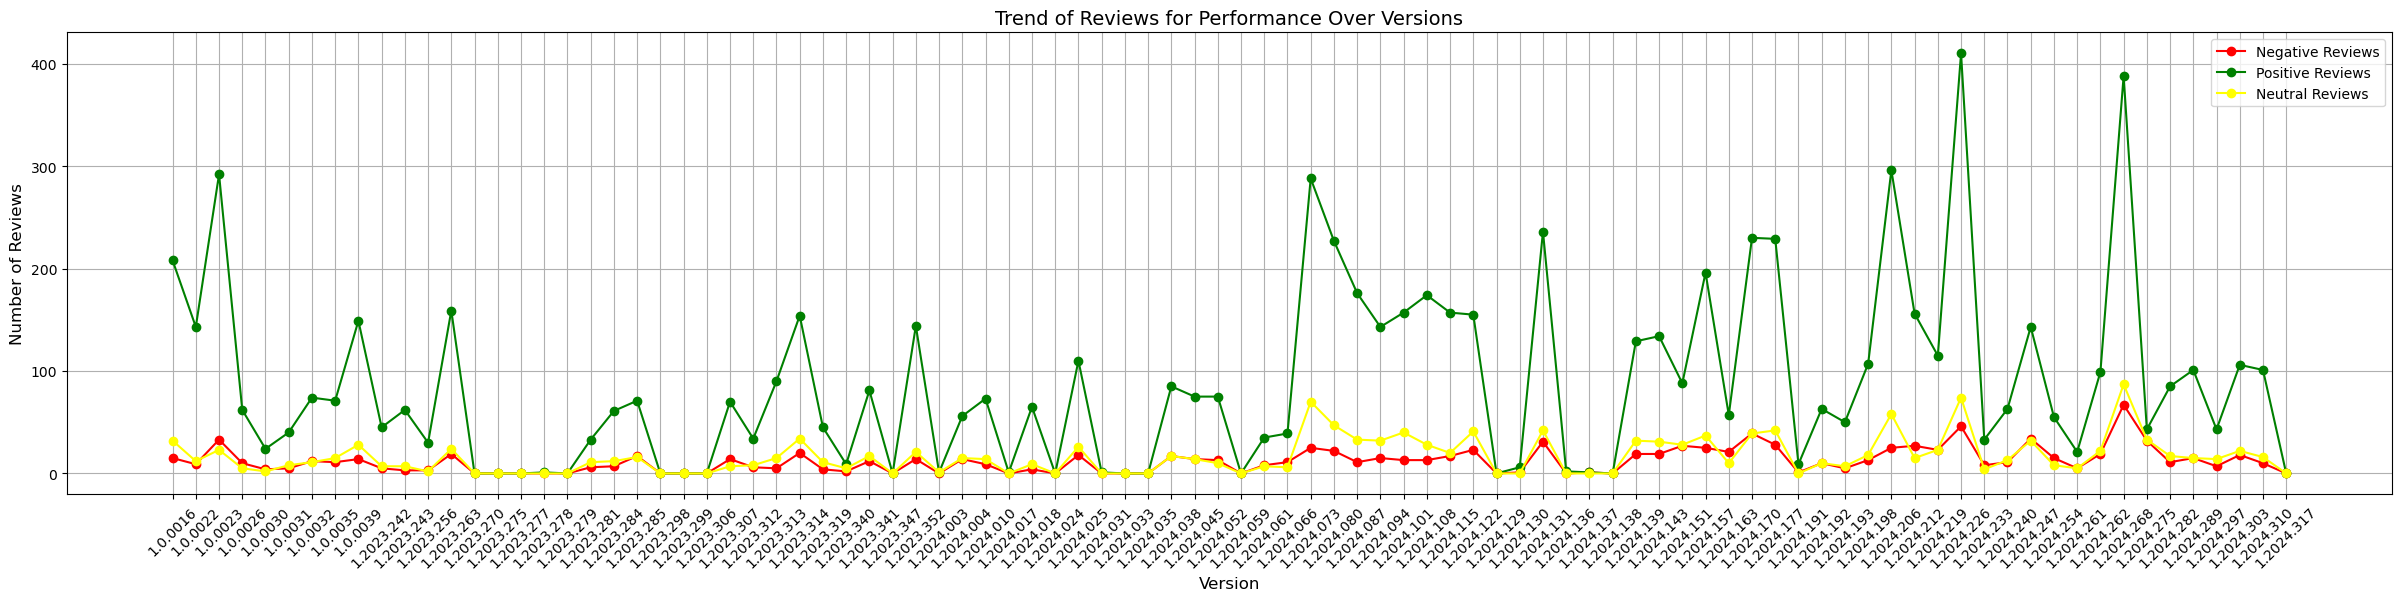

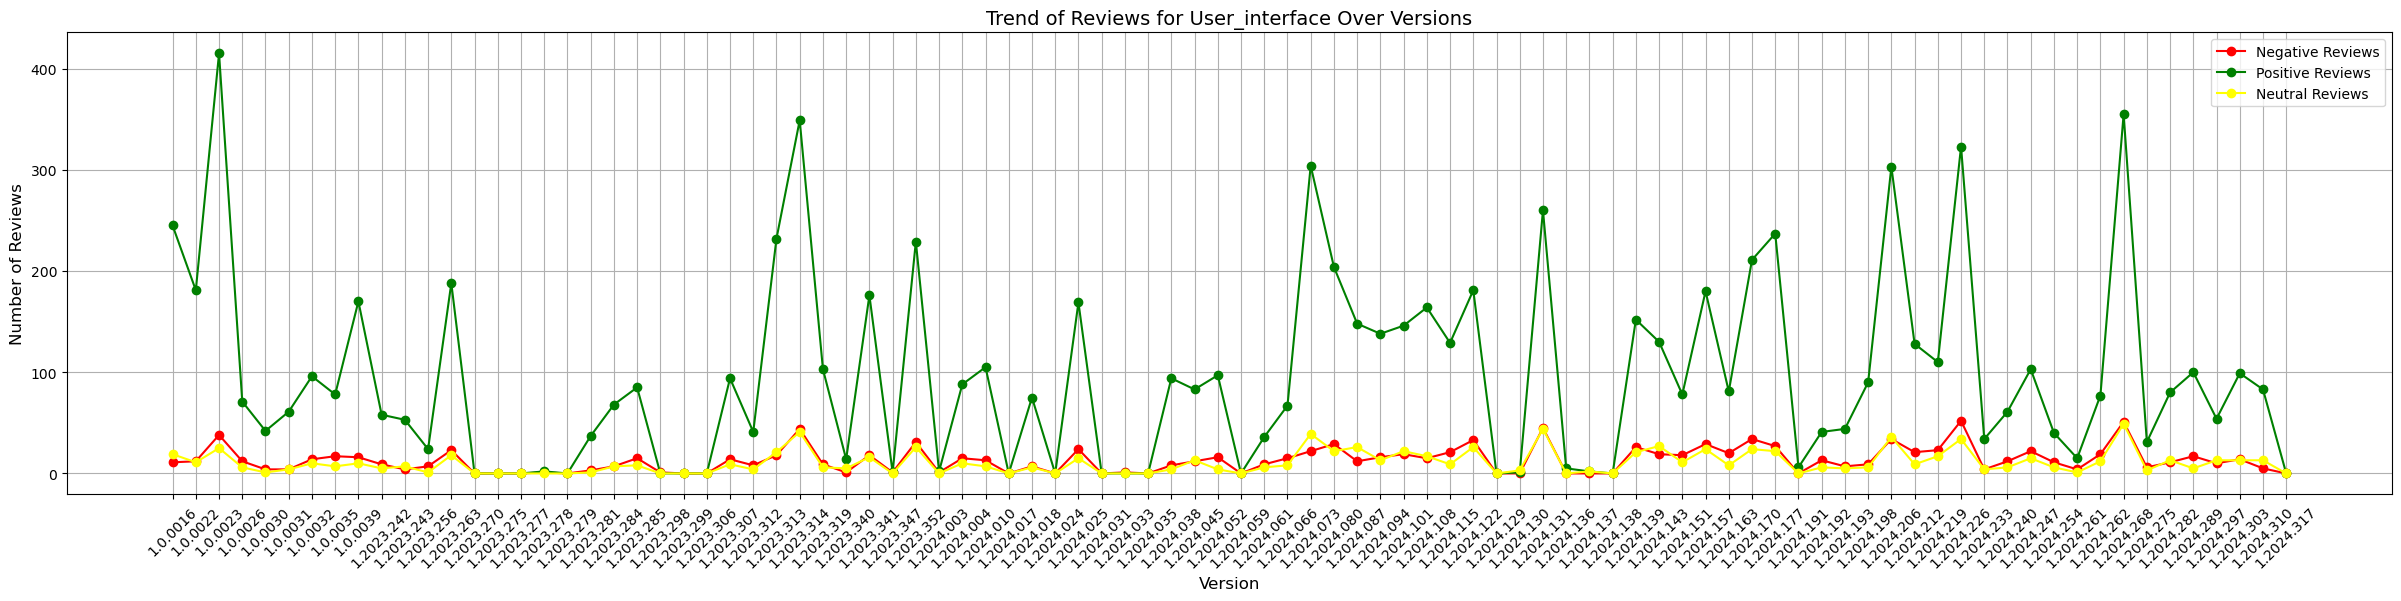

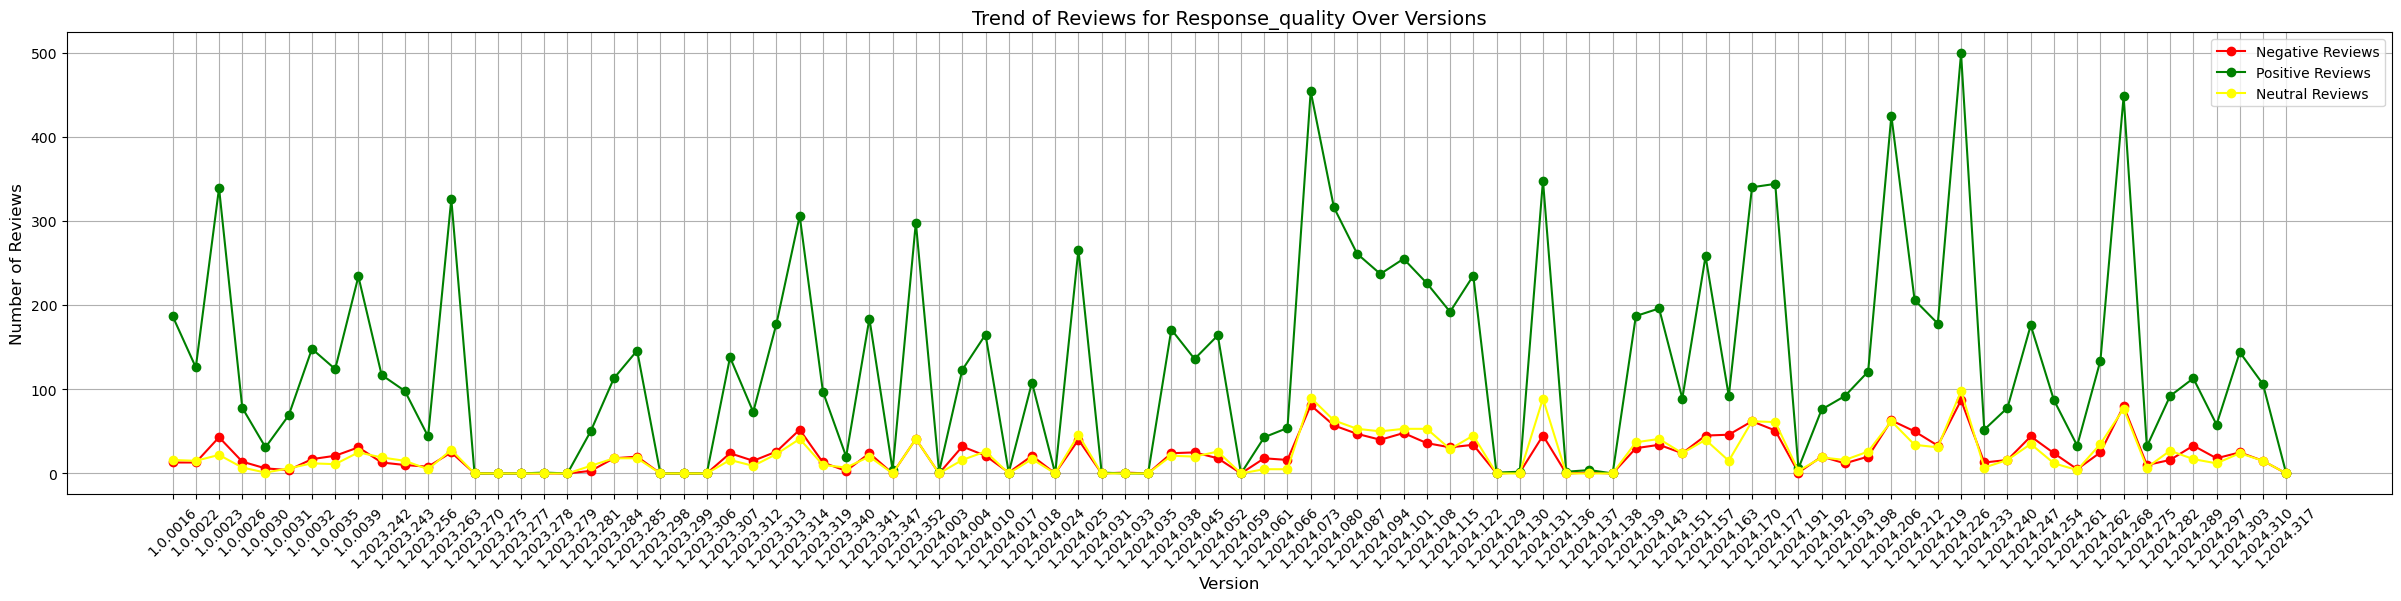

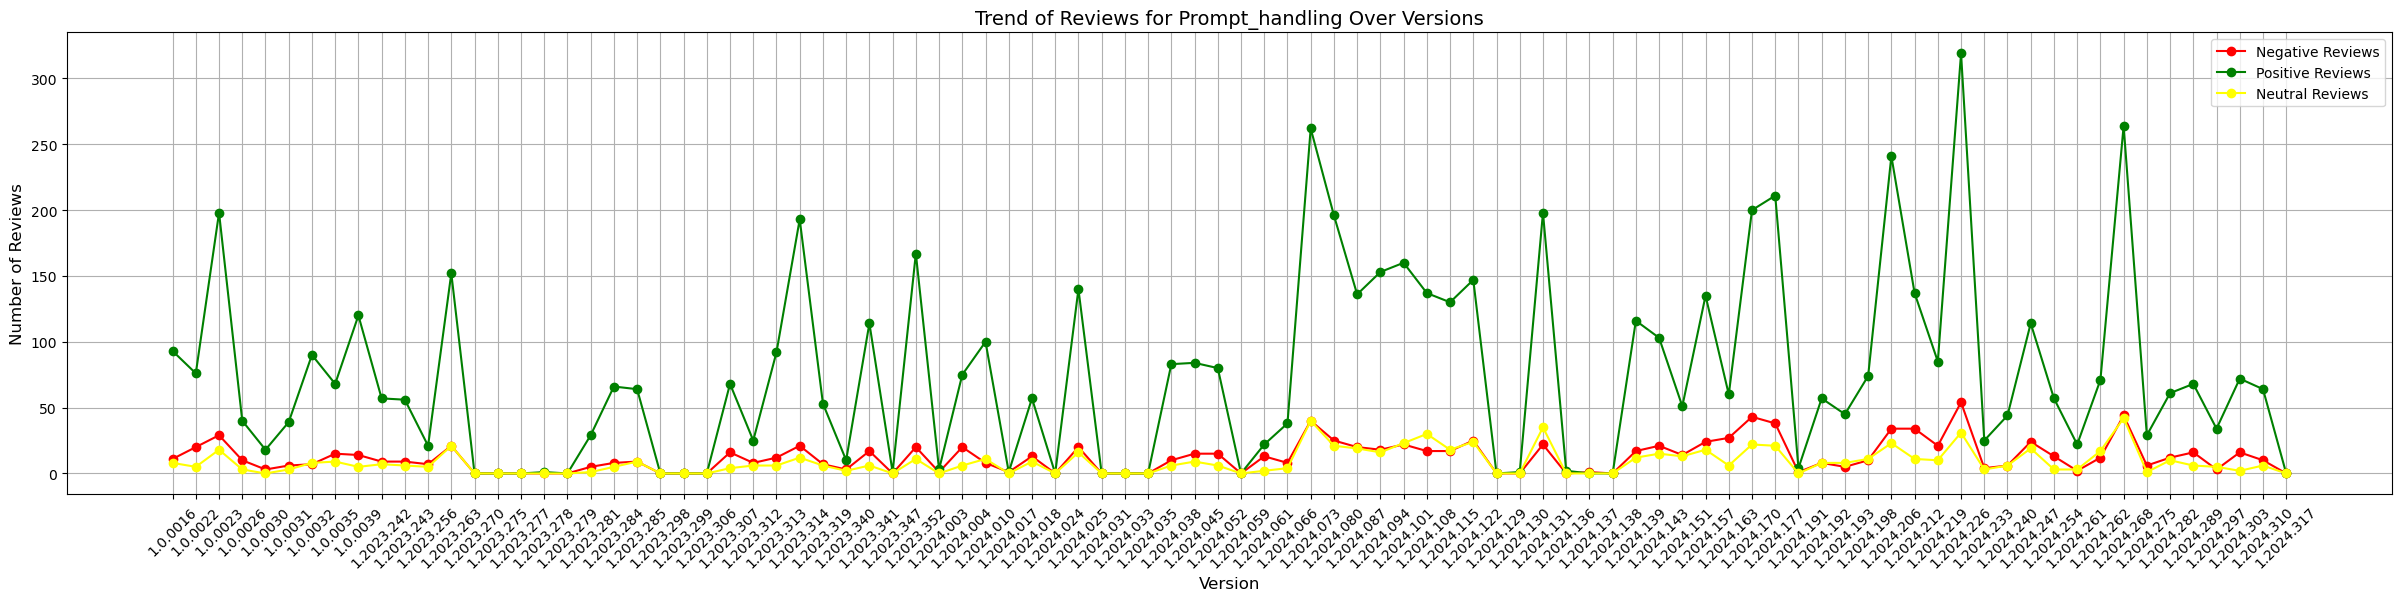

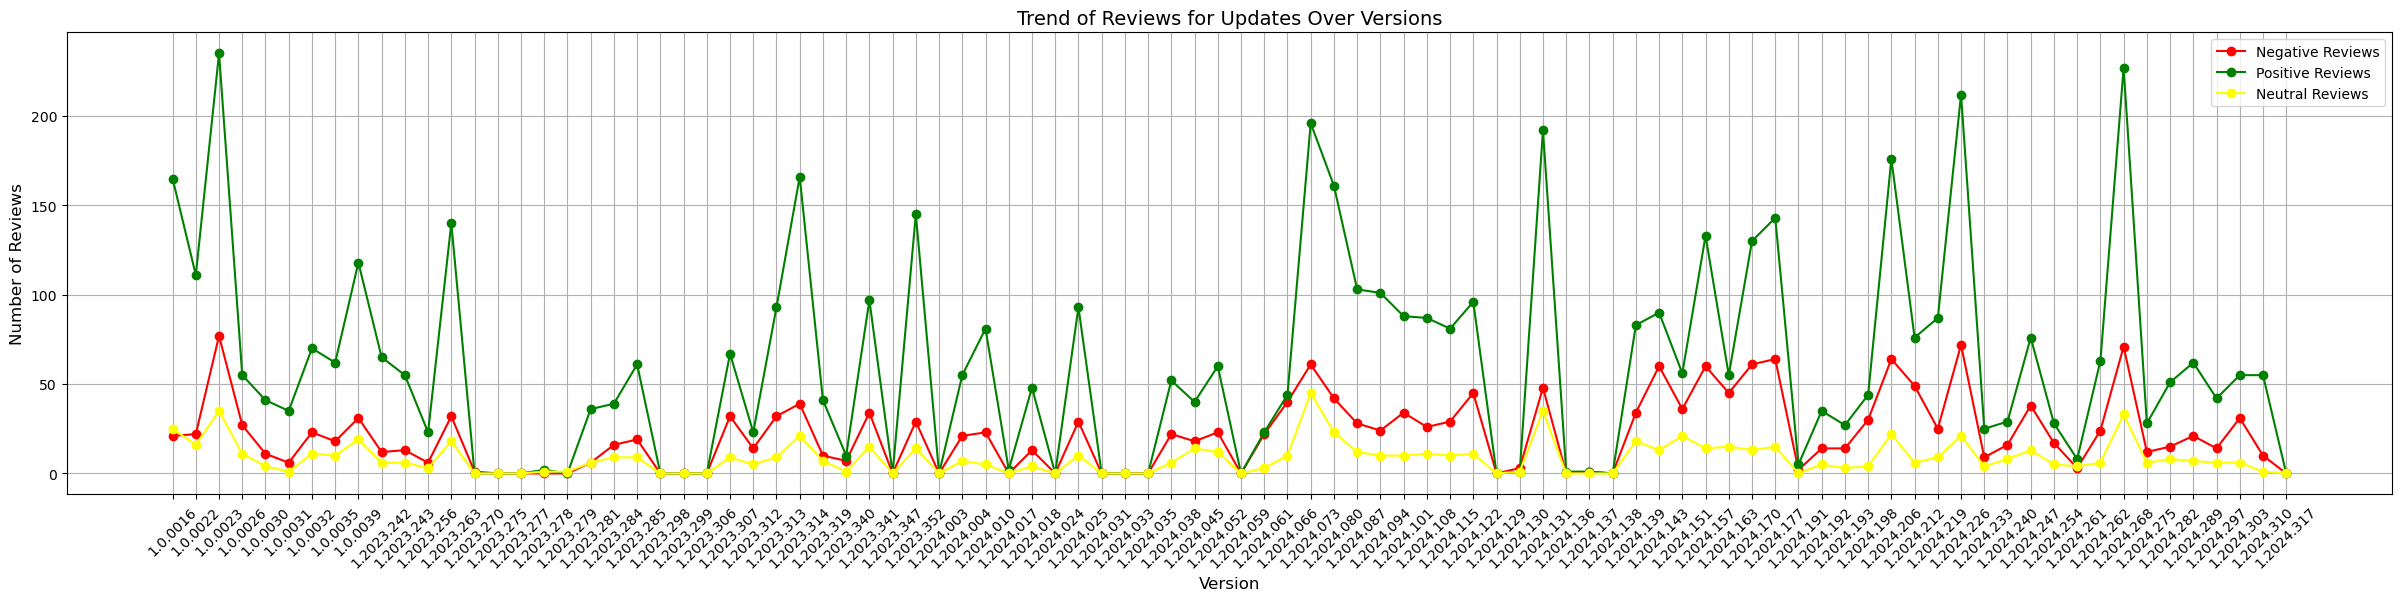

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

function_types = ['performance', 'user_interface', 'response_quality', 'prompt_handling', 'updates']

# Filter out "Unknown" versions
valid_version_data = data[data['appVersion'] != 'Unknown']

# Make sure version number ordering is not affected (keep it as a string)
valid_version_data['appVersion'] = valid_version_data['appVersion'].astype(str)

# Plot the number of positive, negative, and neutral reviews for each classification feature
for func in function_types:
    # Response to negative comments
    negative_counts = valid_version_data[valid_version_data['Comment_Sentiment'] == 'Negative Sentiment'] \
        .groupby('appVersion')[func].sum().reset_index(name='Negative_Count')

    # For positive reviews
    positive_counts = valid_version_data[valid_version_data['Comment_Sentiment'] == 'Positive Sentiment'] \
        .groupby('appVersion')[func].sum().reset_index(name='Positive_Count')

    # For neutral comments
    neutral_counts = valid_version_data[valid_version_data['Comment_Sentiment'] == 'Neutral Sentiment'] \
        .groupby('appVersion')[func].sum().reset_index(name='Neutral_Count')

    # Merge positive, negative, and neutral review data
    counts = pd.merge(negative_counts, positive_counts, on='appVersion', how='outer').fillna(0)
    counts = pd.merge(counts, neutral_counts, on='appVersion', how='outer').fillna(0)
    counts = counts.sort_values(by='appVersion')

    # Draw a line chart
    plt.figure(figsize=(30, 6))
    plt.plot(counts['appVersion'], counts['Negative_Count'], marker='o', label='Negative Reviews', color='red')
    plt.plot(counts['appVersion'], counts['Positive_Count'], marker='o', label='Positive Reviews', color='green')
    plt.plot(counts['appVersion'], counts['Neutral_Count'], marker='o', label='Neutral Reviews', color='yellow')
    plt.title(f'Trend of Reviews for {func.capitalize()} Over Versions', fontsize=14)
    plt.xlabel('Version', fontsize=12)
    plt.ylabel('Number of Reviews', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.show()


/var/folders/g5/rh17cc010_75svb2l5rt9bcw0000gn/T/ipykernel_49556/591868819.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_version_data['appVersion'] = valid_version_data['appVersion'].astype(str)


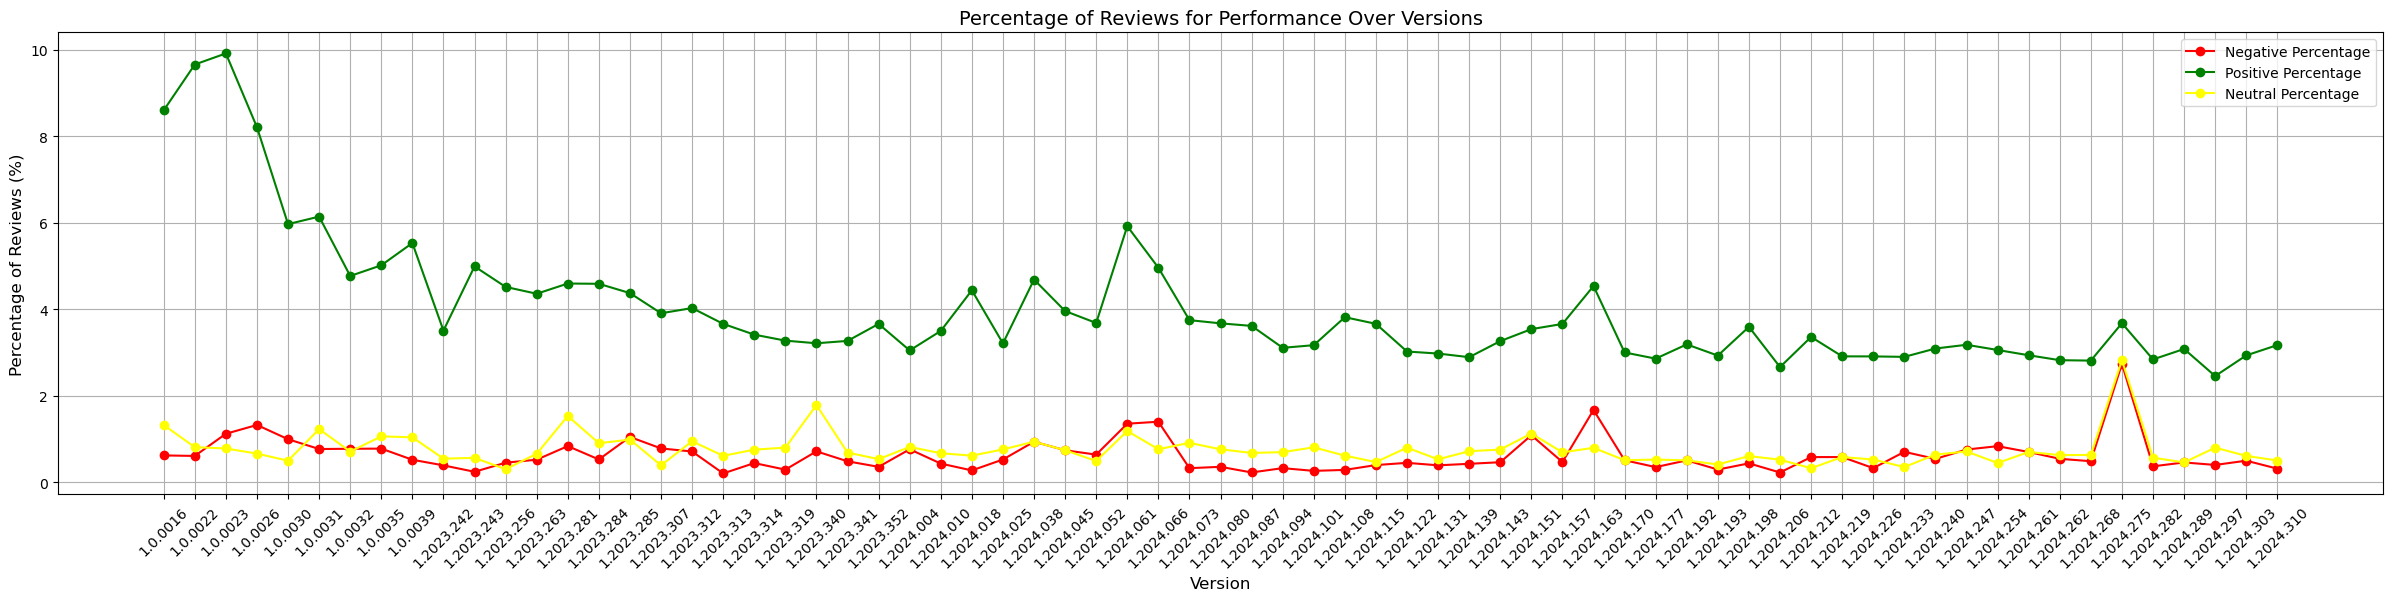

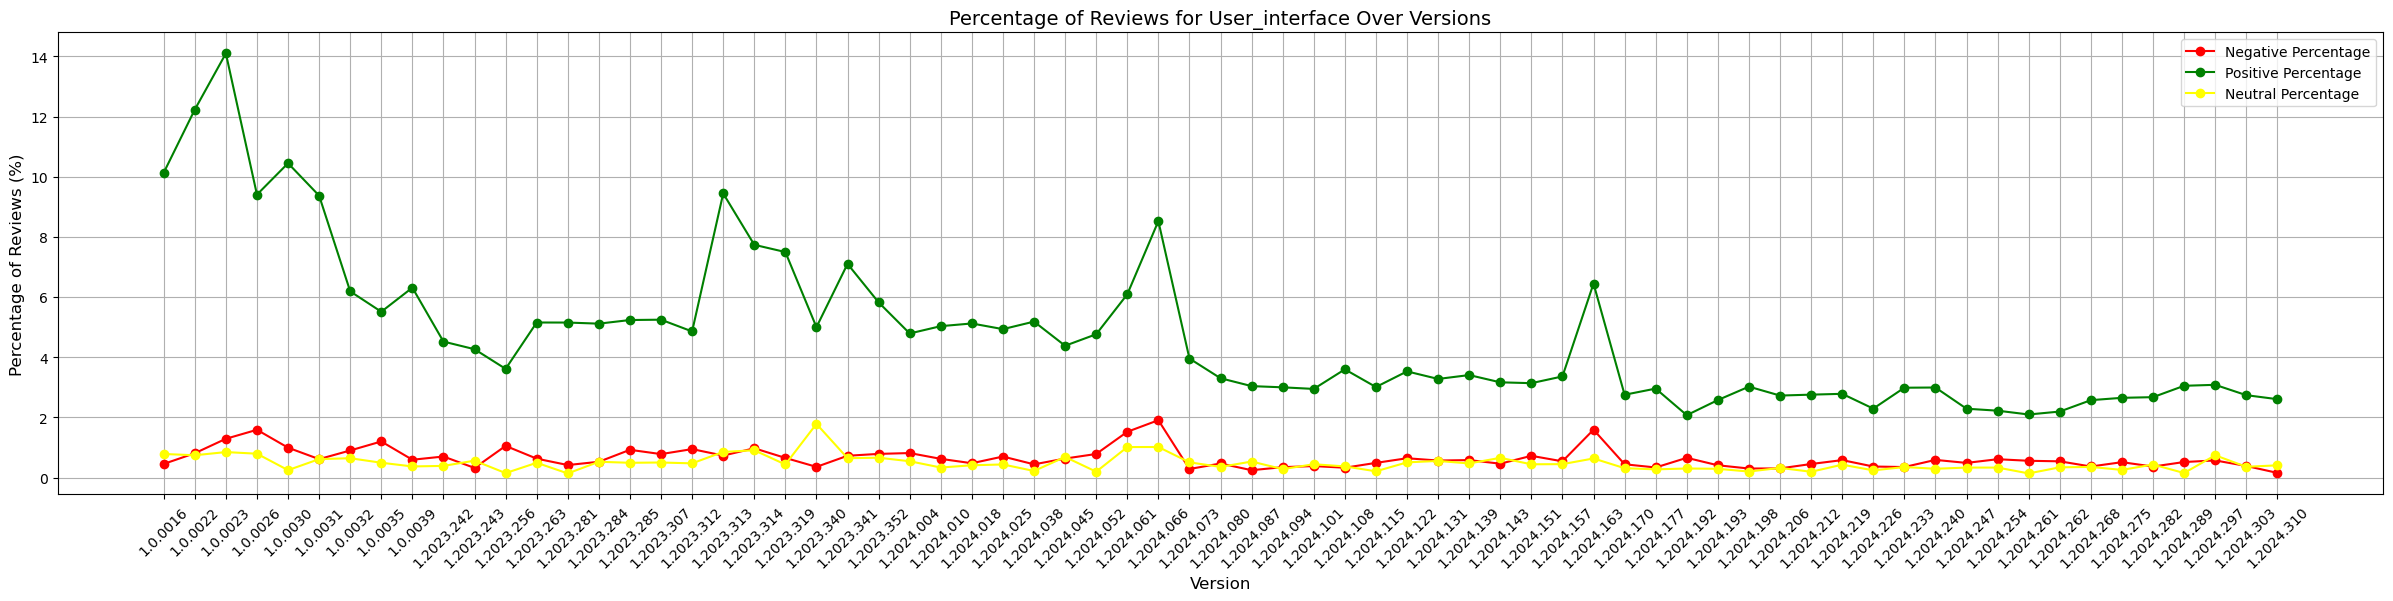

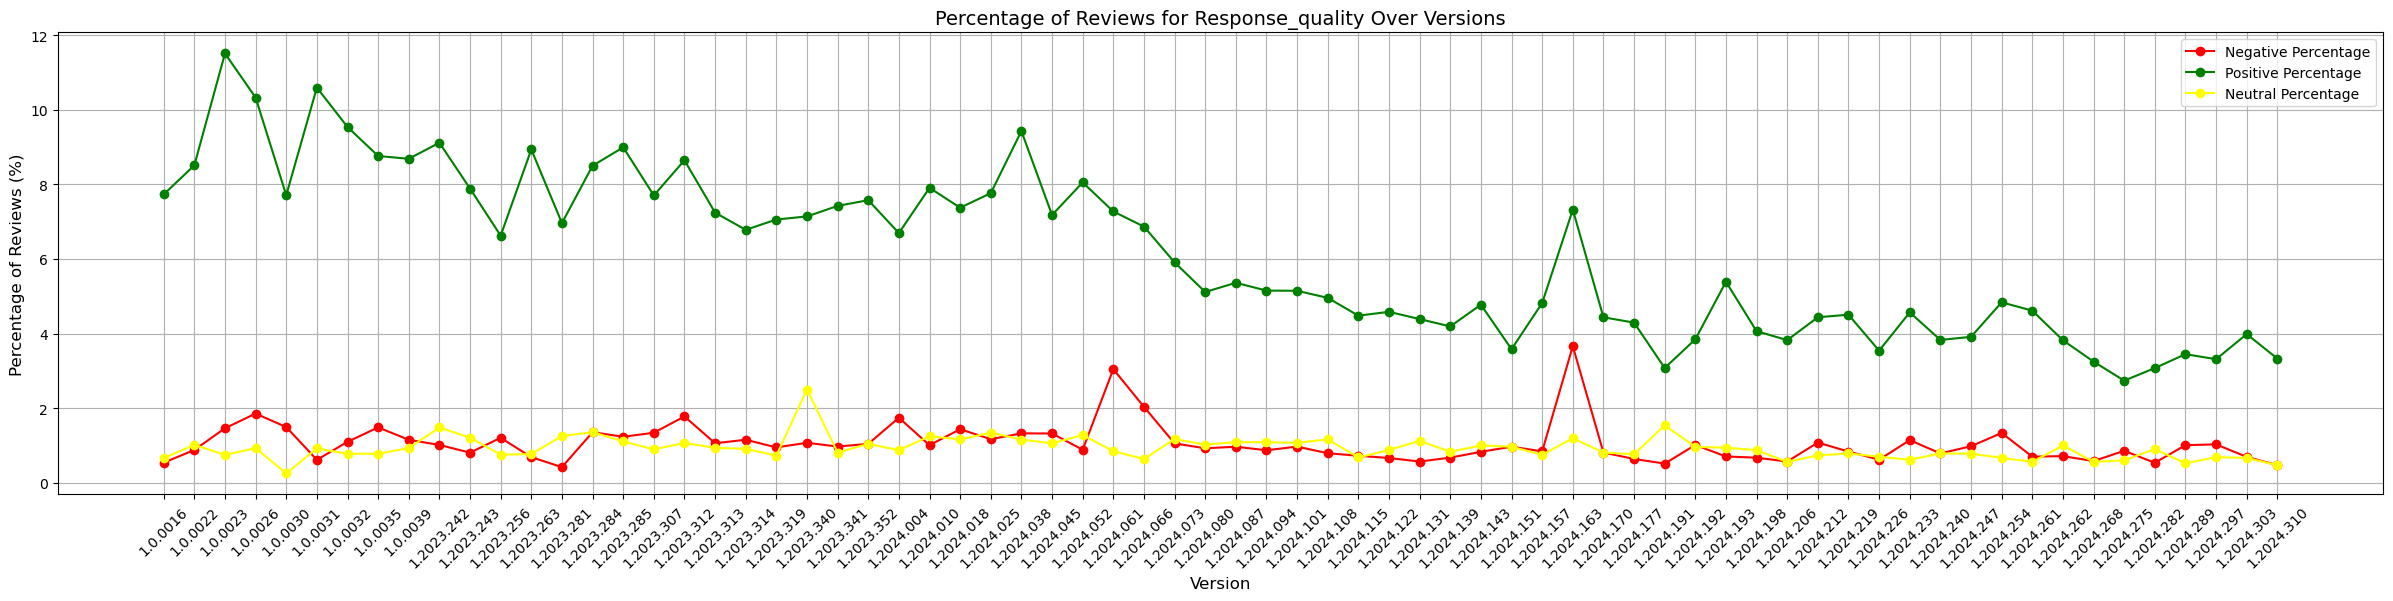

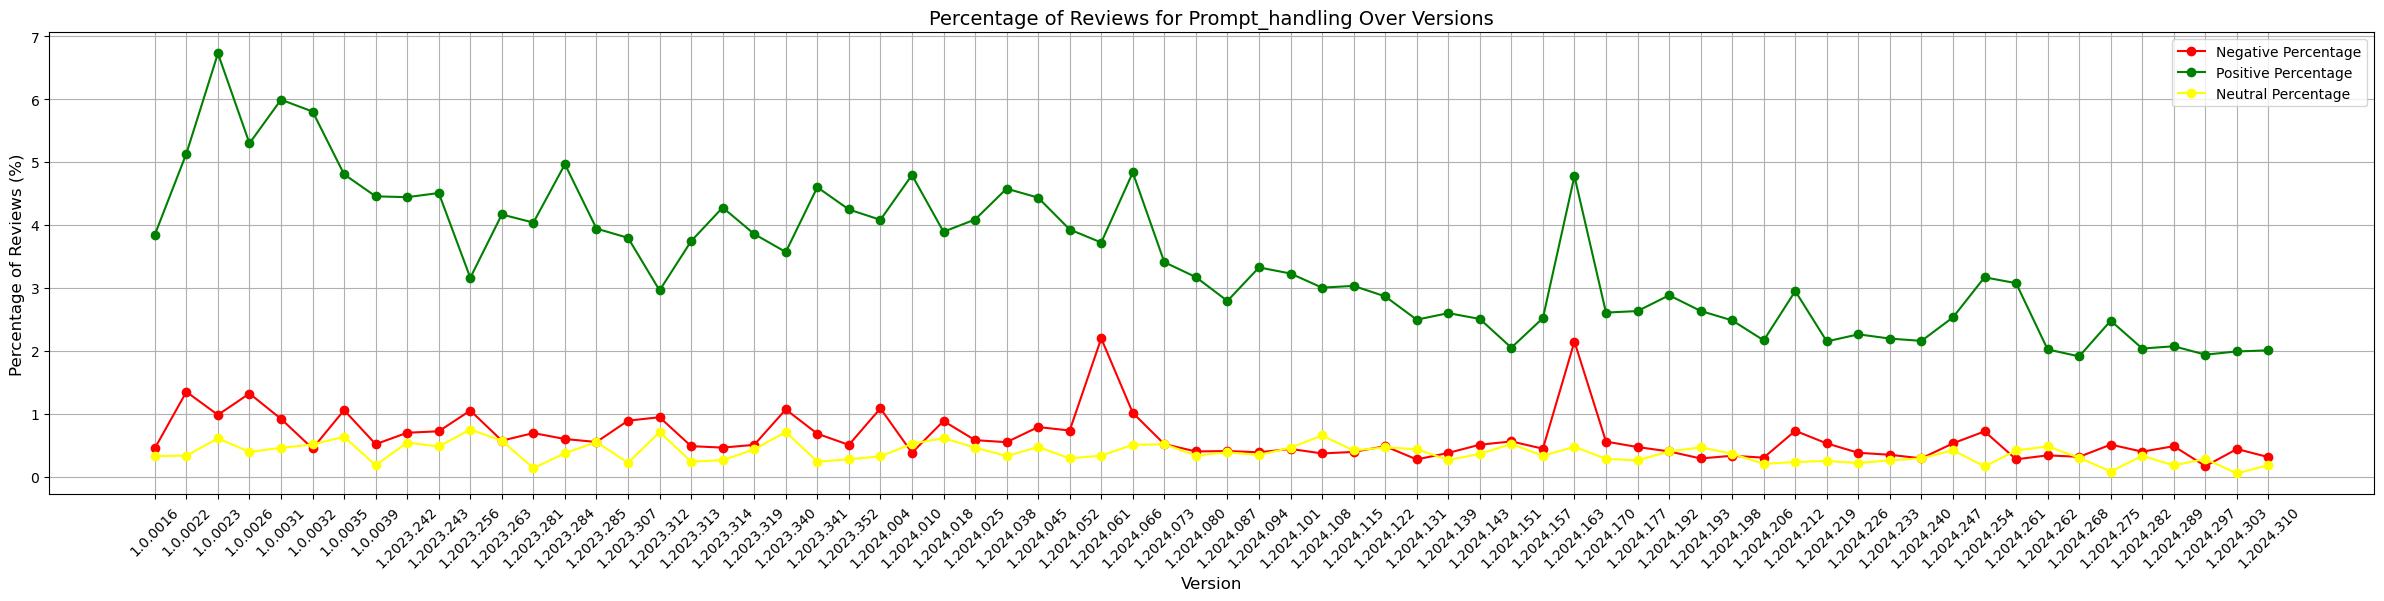

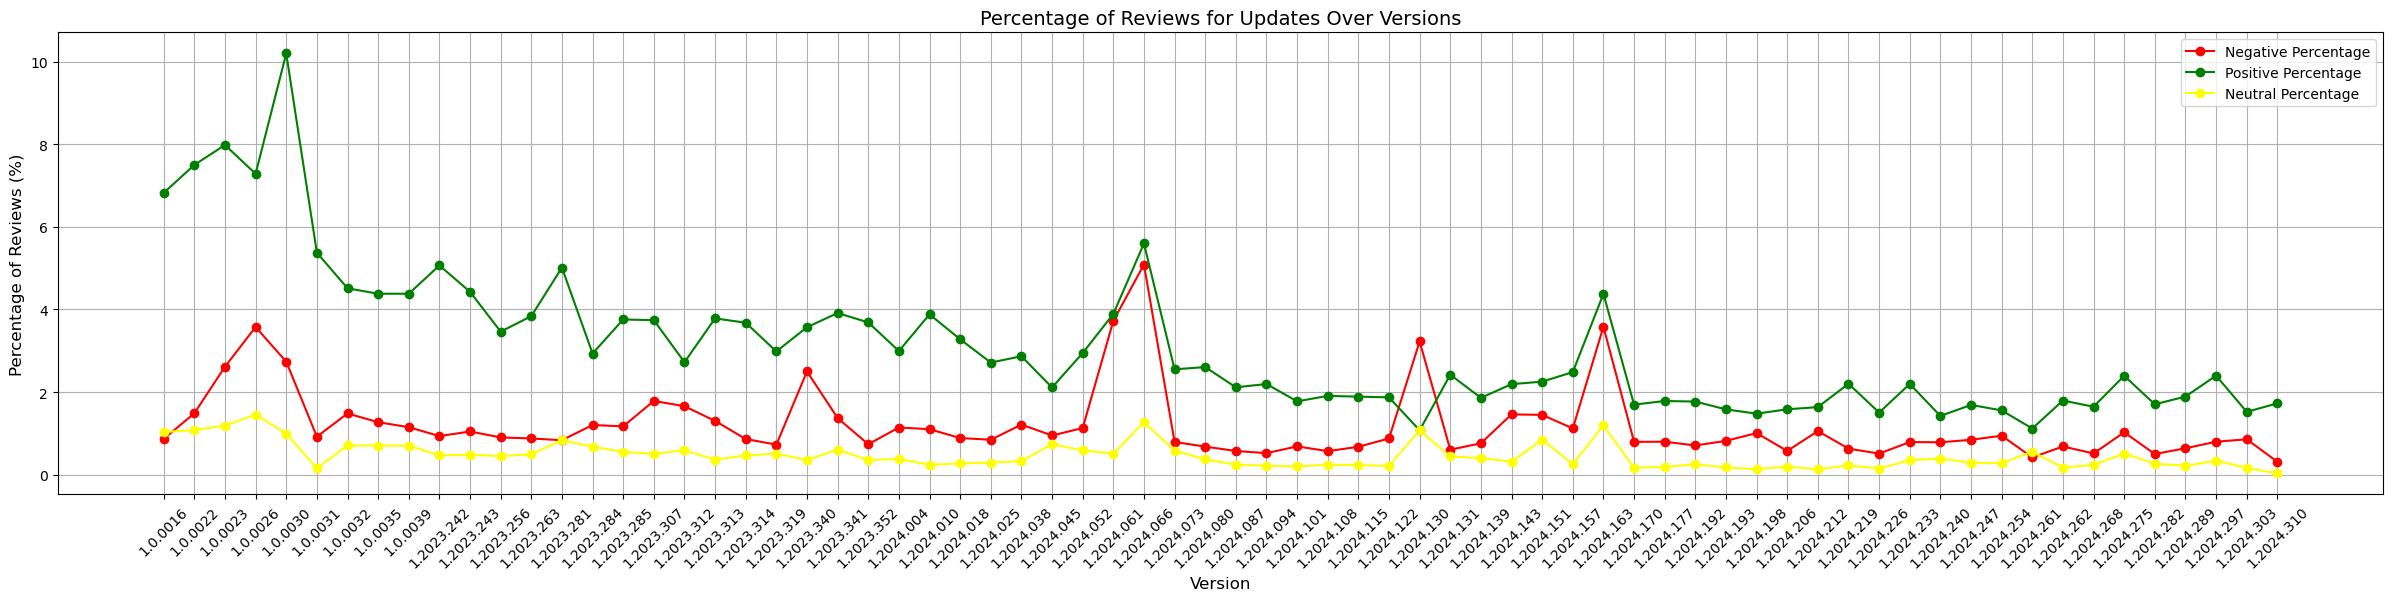

In [20]:

import pandas as pd
import matplotlib.pyplot as plt

# Defining feature types
function_types = ['performance', 'user_interface', 'response_quality', 'prompt_handling', 'updates']

# Filter out "Unknown" versions
valid_version_data = data[data['appVersion'] != 'Unknown']

# Make sure version number ordering is not affected (keep it as a string)
valid_version_data['appVersion'] = valid_version_data['appVersion'].astype(str)

# Plot the percentage of positive, negative and neutral reviews for each classification feature
for func in function_types:

    negative_counts = valid_version_data[valid_version_data['Comment_Sentiment'] == 'Negative Sentiment'] \
        .groupby('appVersion')[func].sum().reset_index(name='Negative_Count')

    positive_counts = valid_version_data[valid_version_data['Comment_Sentiment'] == 'Positive Sentiment'] \
        .groupby('appVersion')[func].sum().reset_index(name='Positive_Count')

    neutral_counts = valid_version_data[valid_version_data['Comment_Sentiment'] == 'Neutral Sentiment'] \
        .groupby('appVersion')[func].sum().reset_index(name='Neutral_Count')

    # Calculate the total number of comments for each version
    total_counts = valid_version_data.groupby('appVersion').size().reset_index(name='Total_Count')

    # Combine positive, negative, neutral and total reviews
    counts = pd.merge(total_counts, negative_counts, on='appVersion', how='left').fillna(0)
    counts = pd.merge(counts, positive_counts, on='appVersion', how='left').fillna(0)
    counts = pd.merge(counts, neutral_counts, on='appVersion', how='left').fillna(0)

    # Calculating Percentages
    counts['Negative_Percentage'] = (counts['Negative_Count'] / counts['Total_Count']) * 100
    counts['Positive_Percentage'] = (counts['Positive_Count'] / counts['Total_Count']) * 100
    counts['Neutral_Percentage'] = (counts['Neutral_Count'] / counts['Total_Count']) * 100

    counts = counts[
        (counts['Negative_Percentage'] > 0) & (counts['Negative_Percentage'] < 100) &
        (counts['Positive_Percentage'] > 0) & (counts['Positive_Percentage'] < 100) &
        (counts['Neutral_Percentage'] > 0) & (counts['Neutral_Percentage'] < 100)
    ]
    
    # Exclude revisions without comments, and sort by revision
    counts = counts[counts['Total_Count'] > 0].sort_values(by='appVersion')

    # Draw a percentage trend chart
    plt.figure(figsize=(30, 6))
    plt.plot(counts['appVersion'], counts['Negative_Percentage'], marker='o', label='Negative Percentage', color='red')
    plt.plot(counts['appVersion'], counts['Positive_Percentage'], marker='o', label='Positive Percentage', color='green')
    plt.plot(counts['appVersion'], counts['Neutral_Percentage'], marker='o', label='Neutral Percentage', color='yellow')
    plt.title(f'Percentage of Reviews for {func.capitalize()} Over Versions', fontsize=14)
    plt.xlabel('Version', fontsize=12)
    plt.ylabel('Percentage of Reviews (%)', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.show()
